In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gymnasium as gym
import matplotlib
import windy
from sarsa import sarsa
from utils import run_episode
from plot import plot_windy_results, plot_2d_animated_heatmap
from mc import monte_carlo_control_eps_soft
import plotly.express as px
import numpy as np
from compiled.utils import q_to_2d_v
matplotlib.rcParams['figure.figsize'] = [8, 8]

In [3]:
env = gym.make('WindyGridworld-v0')

In [4]:
q, policy, history = sarsa(env, 500, eps0=0.5, alpha=0.5, gamma=0.9, return_history=True)

  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\sam24\.conda\envs\rl\lib\site-packages\gymnasium\utils\passive_env_checker.py:218: UserWarning:

WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`

100%|██████████| 500/500 [00:02<00:00, 211.99it/s]


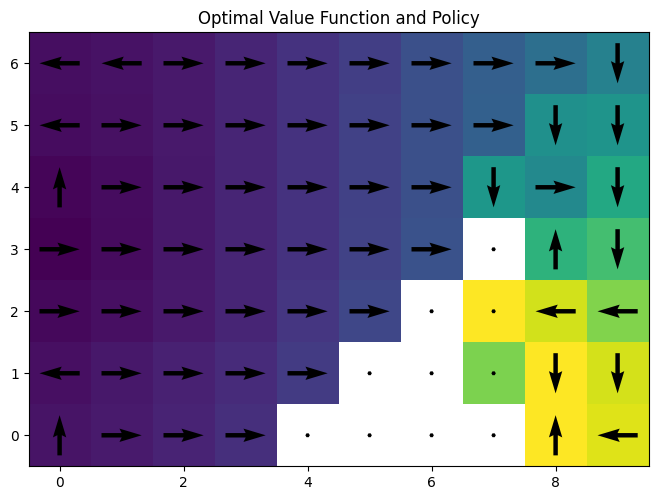

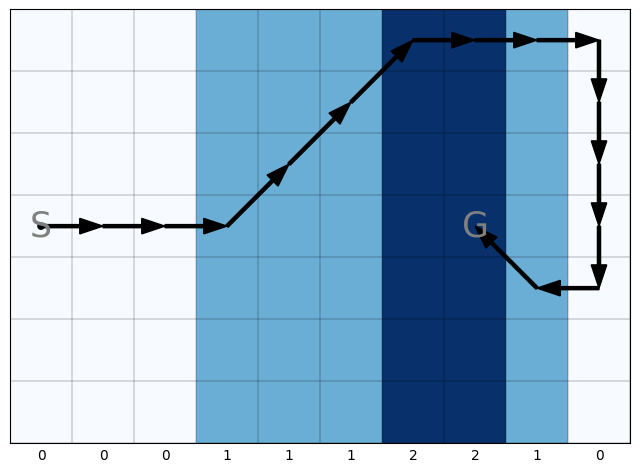

Episode length = 15


In [6]:
plot_windy_results(env, q, policy)
rewards = run_episode(env, policy, render=True)
print(f"Episode length = {len(rewards[2])}")

In [47]:
grid_hist = [q_to_2d_v(q, env) for q in history['q']]
plot_2d_animated_heatmap(grid_hist)

### Windy Gridworld with King's Moves

Adding king's moves to the problem allows the agent to reach the goal in 7 steps. Thanks to the
diagonal moves it's now possible to "fight" the wind and progress toward the goal at the same
time. In the region with the wind strength of 1 it's possible to move horizontally thanks to the
south-east action that counter-acts the wind effect.

  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\sam24\.conda\envs\rl\lib\site-packages\gymnasium\utils\passive_env_checker.py:218: UserWarning:

WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`

100%|██████████| 500/500 [00:01<00:00, 402.56it/s]


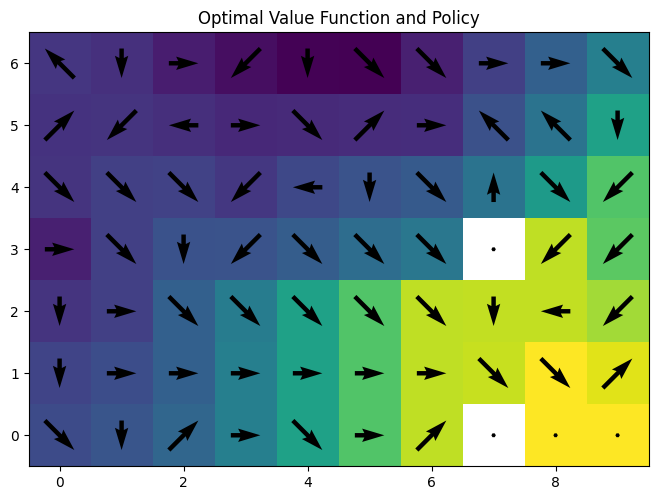

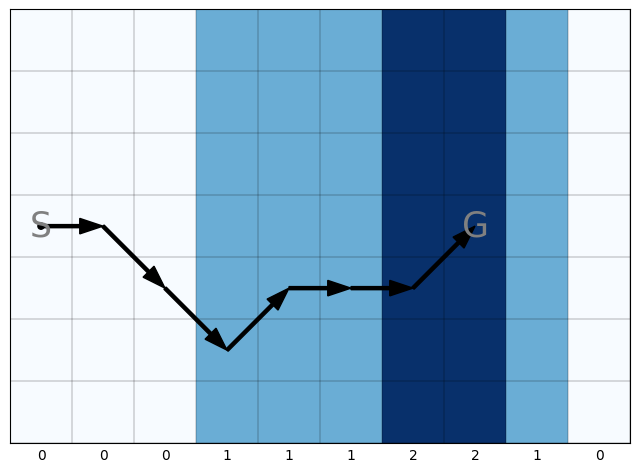

Episode length = 7


In [7]:
env = gym.make('WindyGridworld-v0', king=True)
q, policy, history = sarsa(env, 500, eps0=0.5, alpha=0.5, gamma=0.9, return_history=True)
plot_windy_results(env, q, policy)
rewards = run_episode(env, policy, render=True)
print(f"Episode length = {len(rewards[2])}")

In [50]:
grid_hist = [q_to_2d_v(q, env) for q in history['q']]
plot_2d_animated_heatmap(grid_hist)

### Windy Gridworld with King's Moves and Stop

Adding a stop action doesn't allow the algorithm to findd a better policy than with king's
moves alone. The reason is that king's moves already make it possible to get the best possible
solution within the limitation of moving one gridworld tile at a time.

Even in a situation without any wind, it's not possible to reach the goal in less than
7 steps. The optimal policy in this particular case is to follow a straight line from
start to the goal - a 7 steps long path. The optimal path length in the wind-less case
is "broadway distance" (i.e. manhattan distance with diagonal moves) from start to goal.

100%|██████████| 500/500 [00:01<00:00, 366.42it/s]


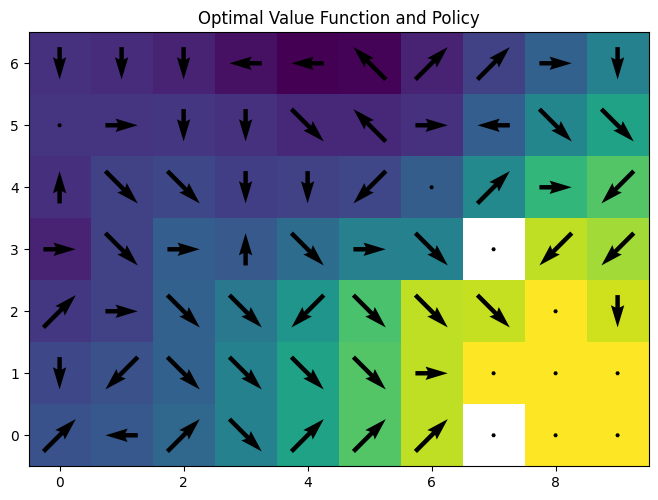

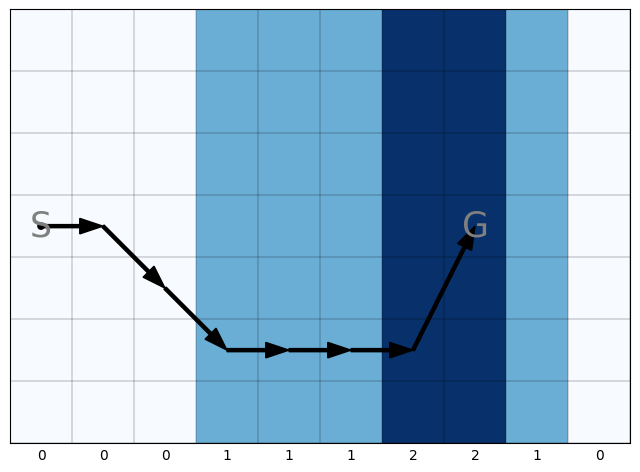

Episode length = 7


In [8]:
env = gym.make('WindyGridworld-v0', king=True, stop=True)
q, policy, history = sarsa(env, 500, eps0=0.5, alpha=0.5, gamma=0.9, return_history=True)
plot_windy_results(env, q, policy)
rewards = run_episode(env, policy, render=True)
print(f"Episode length = {len(rewards[2])}")

### Windy Gridworld with King's Moves and Stochastic Wind

Because the environment is stochastic and the outcomes of the moves in the windy area are
non-deterministic the convergence of the Sarsa algorithm benefits a smaller learning rate
$\alpha$ to limit the effect of noisy updates on the value function.

100%|██████████| 1000/1000 [00:08<00:00, 113.28it/s]


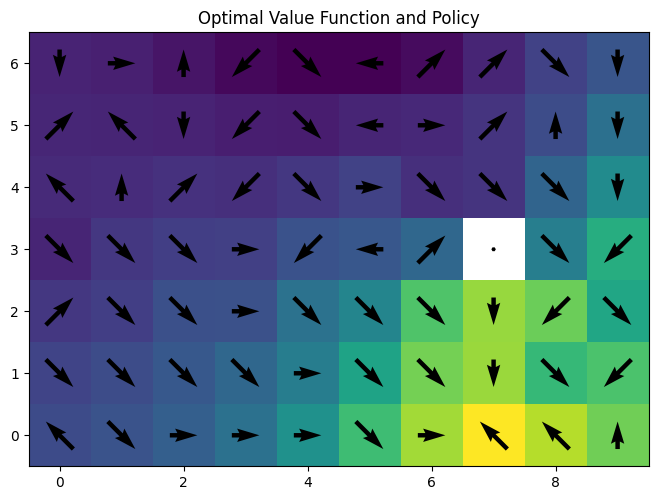

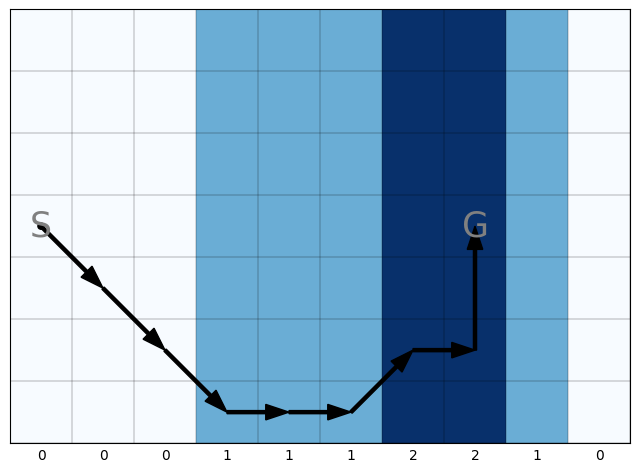

Episode length = 8


In [15]:
env = gym.make('WindyGridworld-v0', king=True, stochastic=True)
q, policy, history = sarsa(env, 1000, eps0=0.5, alpha=0.1, gamma=0.9, return_history=True)
plot_windy_results(env, q, policy)
rewards = run_episode(env, policy, render=True)
print(f"Episode length = {len(rewards[2])}")